引入我们需要的包和数据，并观察数据

In [1]:
import pandas as pd

data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


划分训练集和测试集，特征和标签

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
print X.head()

y = data['Sales']
print y.head()

from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
(150, 3)
(150,)
(50, 3)
(50,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


引入随机森林并训练模型

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor

In [8]:
iris = load_iris()
rf = RandomForestRegressor(n_jobs=2)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

对测试集进行预测

In [9]:
y_pred = rf.predict(X_test)
print y_pred
print type(y_pred)

[ 22.76  15.99   9.7   13.69  15.83  24.31  17.69  13.71  10.73  16.69
  14.47  10.62  16.93  16.03  12.7   15.72  12.93  11.94   6.27  17.92
   9.88  13.34   8.13  12.16  13.19  15.04  10.25  20.16  19.2   15.61
  22.94  12.31  16.3   12.48  20.26  15.3   11.8   11.    21.68   7.09
   5.94   9.71   6.85  18.32   6.46  13.44  13.73  21.09  21.68  19.62]
<type 'numpy.ndarray'>


计算误差

In [10]:
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print "RMSE by hand:",sum_erro

RMSE by hand: 0.847413712422


画图显示结果

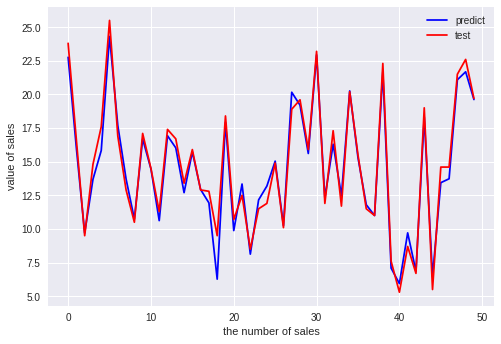

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()